<a href="https://colab.research.google.com/github/AliWindsor/Road-Sign-Image-Classification-Model/blob/main/1803667_ImageClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

39419


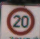

In [ ]:
#Used CNN and Image Classification tutorials on tensorflow as a starting point.
#You can dow-nload the zip file for the dataset here: https://drive.google.com/file/d/11I5pDQnr-MDRZWrLEYpSNfjArvtgW15n/view?usp=sharing

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from google.colab import drive 

#drive.mount('/content/drive')
#!unzip -q "drive/My Drive/roadsign_photos.zip"

data_dir_train = "roadsign_photos/Train"
data_dir_train = pathlib.Path(data_dir_train)

test_data = "roadsign_photos/Test"
test_data = pathlib.Path(test_data)

testImg = list(test_data.glob('*.png'))


image_count = len(list(data_dir_train.rglob('*.png')))
print(image_count)

speedlimit_20 = list(data_dir_train.glob('20_speed/*'))
PIL.Image.open(str(speedlimit_20[0]))

Text(0.5, 1.0, 'Class Data Distribution')

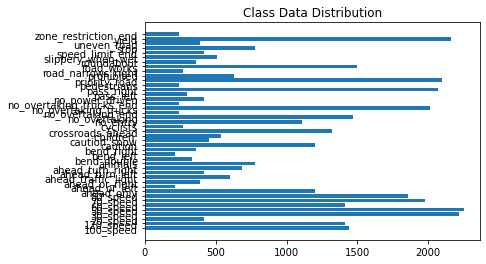

In [ ]:
dd_arr = []
for i in range(len(class_names)):
  dd = len(list(data_dir_train.glob(str(class_names[i])+'/*')))
  dd_arr.append(dd)
  #print(i, class_names[i], dd)

plt.barh(class_names, dd_arr)
plt.title('Class Data Distribution')

In [ ]:
#Dataset

#Parameters
batch_size = 32
img_height = 180
img_width = 180

#Training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#Class Names
class_names=train_ds.class_names
print(class_names)

"""
#Visualising Images

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5,5, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Manually iterate over the dataset to get image batches
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


#Configure Dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
"""

Found 39419 files belonging to 43 classes.
Using 31536 files for training.
Found 39419 files belonging to 43 classes.
Using 7883 files for validation.
['100_speed', '120_speed', '20_speed', '30_speed', '50_speed', '60_speed', '70_speed', '80_speed', 'ahead_only', 'ahead_or_left', 'ahead_or_right', 'ahead_traffic_light', 'ahead_turn_left', 'ahead_turn_right', 'animals', 'bend_double', 'bend_left', 'bend_right', 'caution', 'caution_snow', 'children ', 'crossroads_ahead', 'cyclists', 'no_entry', 'no_overtaking', 'no_overtaking_end', 'no_overtaking_trucks', 'no_overtaking_trucks_end', 'no_power_driven', 'pass_left', 'pass_right', 'pedestrians', 'priority_road', 'prohibited', 'road_narrows_right', 'road_works', 'roundabout', 'slippery_when_wet', 'speed_limit_end', 'stop', 'uneven_road', 'yield', 'zone_restriction_end']


'\n#Visualising Images\n\nplt.figure(figsize=(10,10))\n\nfor images, labels in train_ds.take(1):\n  for i in range(25):\n    ax = plt.subplot(5,5, i+1)\n    plt.imshow(images[i].numpy().astype("uint8"))\n    plt.title(class_names[labels[i]])\n    plt.axis("off")\n\n#Manually iterate over the dataset to get image batches\nfor image_batch, labels_batch in train_ds:\n  print(image_batch.shape)\n  print(labels_batch.shape)\n  break\n\n\n#Configure Dataset\nAUTOTUNE = tf.data.AUTOTUNE\n\ntrain_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)\nval_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)\n'

In [ ]:
#No overfitting used as dataset is large

num_classes = len(class_names)

tsi_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height,img_width,3)),
  layers.Conv2D(32, (3, 3), activation='relu'), #layers.Conv2D(filters , kernal size, activation)
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), activation='relu'),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
tsi_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0

In [ ]:
tsi_epochs=1

tsi_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tsi_history = tsi_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=tsi_epochs)

986/986 [==============================] - 103s 73ms/step - loss: 2.0877 - accuracy: 0.4315 - val_loss: 0.2663 - val_accuracy: 0.9250


In [ ]:
acc = tsi_history.history['accuracy']
val_acc = tsi_history.history['val_accuracy']

loss = tsi_history.history['loss']
val_loss = tsi_history.history['val_loss']

epochs_range = range(tsi_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

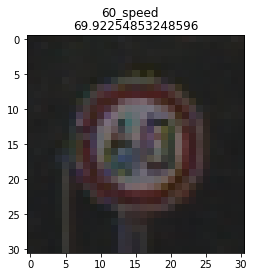

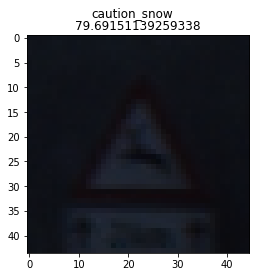

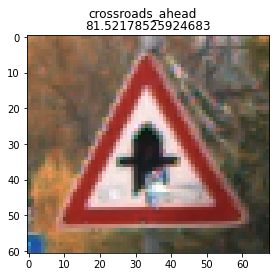

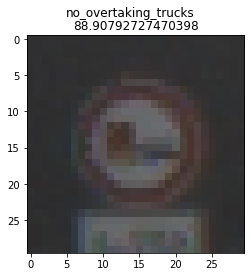

Text(0.5, 1.0, 'Unlabed Testing Results')

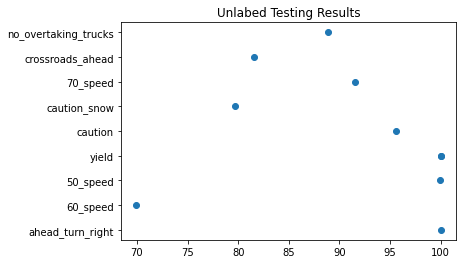

In [ ]:
import matplotlib.image as mpimg

arr_name = []
arr_score = []

for i in range(10):

  img = keras.preprocessing.image.load_img(
        testImg[i], target_size=(img_height, img_width))
      
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = tsi_model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  predictionScore = 100 * np.max(score)
  predictionName = class_names[np.argmax(score)]

  arr_name.append(predictionName)
  arr_score.append(predictionScore)

  if predictionScore <= 90:
    img = mpimg.imread(str(testImg[i]))
    imgplot = plt.imshow(img)
    plt.title(predictionScore)
    plt.suptitle(predictionName)
    plt.show()
  
plt.scatter(arr_score, arr_name)
plt.title("Unlabed Testing Results")


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(tsi_model.predict(x),  axis=-1)])
  labels = np.concatenate([labels, y.numpy()])

In [ ]:
print(tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy())

[[276   3   0 ...   0   0   0]
 [ 49 244   0 ...   0   0   0]
 [  1   0  84 ...   0   1   0]
 ...
 [  0   0   0 ...  82   0   0]
 [  0   0   0 ...   0 413   0]
 [  0   0   0 ...   0   0  37]]


In [ ]:
from string import ascii_uppercase
from pandas import DataFrame
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_test = np.array([1,2,3,4,5, 
                   1,2,3,4,5, 
                   1,2,3,4,5])

predic = np.array([1,2,4,3,5, 
                   1,2,4,3,5, 
                   1,2,3,4,4])

columns = [class_names[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)